In [12]:
import matplotlib.pyplot as plt

import pandas as pd
stats_crimesx = pd.read_csv("interventionscitoyendo.csv")
liste_pdq = pd.read_csv("pdq_point.csv")
liste_arr = pd.read_csv("arrondissement_clean.csv")
stats_crimesx['ANNEE']=pd.DatetimeIndex(stats_crimesx['DATE']).year
stats_crimes = stats_crimesx[(stats_crimesx.ANNEE !=2020)]

##Merge de la table intervention et de la table arrondissement
table_merge = pd.merge(stats_crimes,liste_arr,on=["PDQ"])





### Statistique no.1 -- Crimes commis -- ###
##Sommation (count() du nombre de crime par années (groupby)

Crime commis
ANNEE
2015    35609
2016    33760
2017    32664
2018    28387
2019    27155
Name: DATE, dtype: int64
Graphique des crimes commis par année entre 2015 et 2019


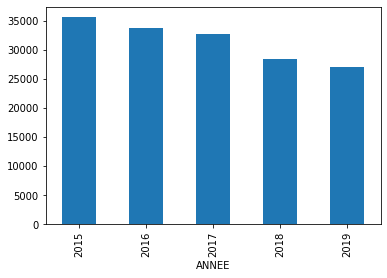

In [24]:
crime_commis = stats_crimes.groupby(["ANNEE"]).count()["DATE"]
print("Crime commis")
print(crime_commis)
##Création d'un graphique a barre
print("Graphique des crimes commis par année entre 2015 et 2019")
crime_commis.plot(kind = "bar")
plt.show()


### Statistique no.2 -- Progression des crimes violents commis à chaque année -- ###

Crime Violent
ANNEE
2015    9823
2016    9820
2017    9223
2018    7460
2019    7011
Name: DATE, dtype: int64
Graphique de la progression des crimes violents commis à chaque année


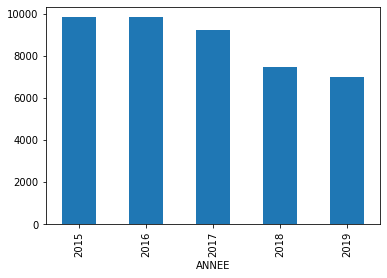

In [23]:
# data_stats2 = stats_crimes[(stats_crimes.CATEGORIE == "Introduction") |(stats_crimes.CATEGORIE == "Infractions entrainant la mort")]
crime_violent = data_stats2.groupby(["ANNEE"]).count()["DATE"]
print("Crime Violent")
print(crime_violent)
##Création d'un graphique a barre
print("Graphique de la progression des crimes violents commis à chaque année")
crime_violent.plot(kind = "bar")
plt.show()


### Statistique no.3 -- Moyenne de crime pour un arrondissement par année -- ###


In [18]:
##Calculer le nombre de département de police
nombre_arrond = stats_crimes["PDQ"].nunique()
##Le nombre de crime commis divisé par le nombre d'arrondissement
crime_moyen_arrondissement = crime_commis/nombre_arrond

print("Nombre de crime moyen pour un arrondissement typique par année")
print(crime_moyen_arrondissement)


Nombre de crime moyen pour un arrondissement typique par année
ANNEE
2015    1047.323529
2016     992.941176
2017     960.705882
2018     834.911765
2019     798.676471
Name: DATE, dtype: float64



### Statistique no.4 -- Moyenne de crime pour un arrondissement pour les 5 dernières années -- ###


In [19]:
##Faire une moyenne 5 ans de la statistique no3.
print("La moyenne annuelle de crime entre 2015 et 2019 pour un arrondissement typique est :",round(crime_moyen_arrondissement.mean()))

La moyenne annuelle de crime entre 2015 et 2019 pour un arrondissement typique est : 927.0



### Statistique no.5 --Moyenne de crime 5 dernières années par arrondissement -- ###

In [20]:

nbpdq = table_merge.groupby(["Arrondissement"]).count()["CATEGORIE"]
nombre_annees = stats_crimes["ANNEE"].nunique()
moyenne_par_arrondissement = nbpdq/nombre_annees
print("Moyenne annuelle de crime par arrondissement (5 dernières années)")
print(moyenne_par_arrondissement)

Moyenne annuelle de crime par arrondissement (5 dernières années)
Arrondissement
Aeroport_international_Pierre-Elliott-Trudeau_de_Montreal                         11.6
Ahuntsic                                                                        1174.8
Anjou                                                                            673.2
Arrondissement_de_Mercier-Hochelaga-Maisonneuve                                 1467.6
Arrondissement_de_Montreal-Nord                                                 1421.0
Baie-DUrfe_Beaconsfield_Kirkland_Sainte-Anne-de-Bellevue_Senneville              371.6
Bordeaux_Cartierville                                                            606.8
Centre-Sud                                                                       921.0
Centre-ville_Ville-Marie_Est_ile_Notre-Dame_ile_Sainte-Helene_Vieux-Montreal    1925.8
Centre-ville_Ville-Marie_Ouest_parc_du_Mont-Royal                               1826.8
Cote-des-Neiges_Mont-Royal_Outremont             